#  Лабораторная работа №2 «ДВПФ и ДПФ»
# Вариант 4
Курс: «Радиофизическая лаборатория», «Лаборатория инфокоммуникационных
технологий» ФРКТ МФТИ


In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
import scipy

In [3]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook


In [4]:
%matplotlib inline

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

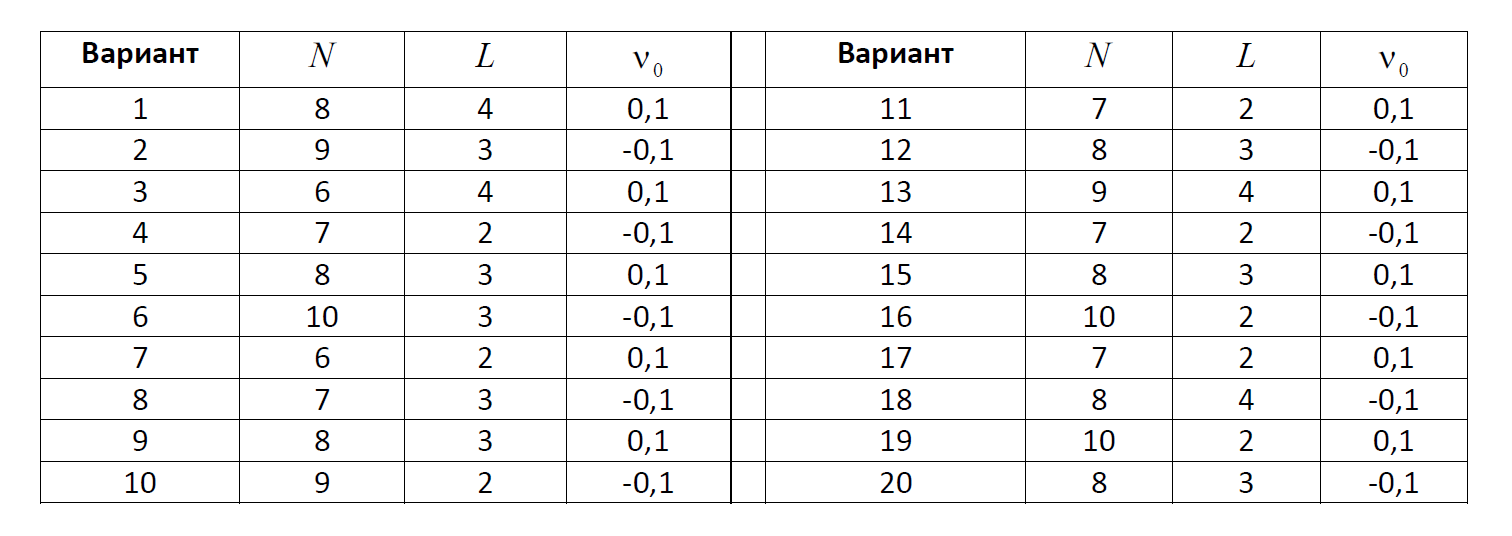

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

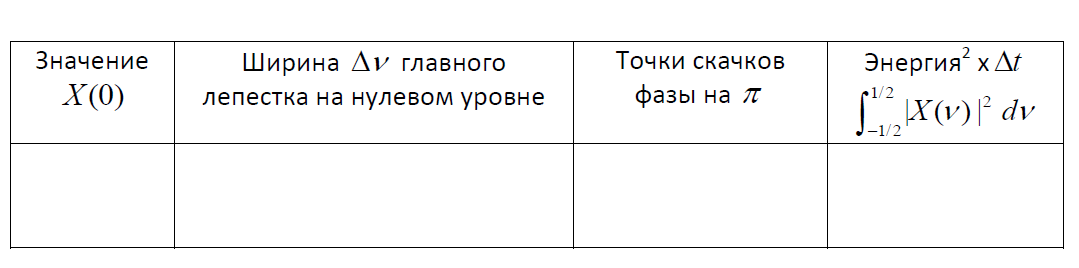

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


In [5]:
N = 7
L = 2
v0 = -0.1

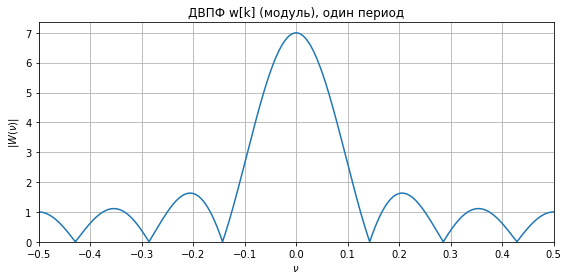

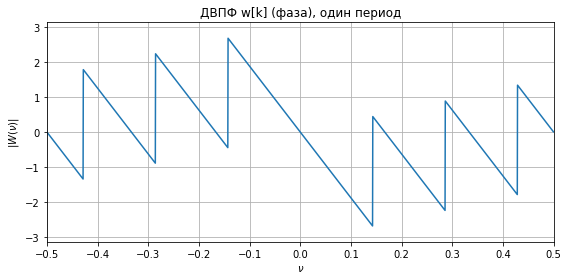

In [6]:
w1 = np.ones(N)

def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

#Построим график для модуля ДВПФ
plt.figure(figsize=[8, 4])
nu, W1 = dtft(w1, 2048)
plt.plot(nu, abs(W1))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

#Теперь выведем фазовую часть ДВПФ
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W1))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

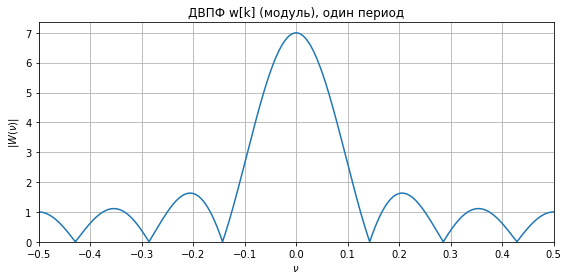

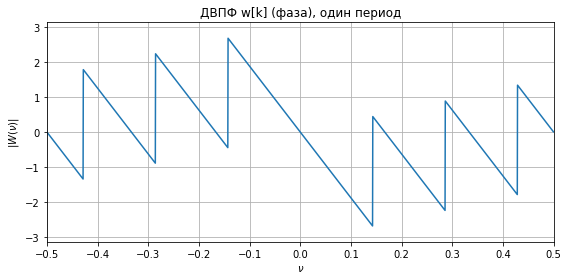

In [7]:
def X(M = 2048):
  v = np.arange(M)/M-0.5
  x = np.linspace(1.0j, 1.0j, M)
  i = 0
  for el in v:
    if(np.sin(np.pi * el) == 0):
      x[i] = N * np.exp(-1j * (N - 1) * np.pi * el)
    else:
      x[i] = np.sin(N * np.pi * el) / np.sin(np.pi * el) * np.exp(-1j * (N - 1) * np.pi * el)
    i += 1
  return v, x

plt.figure(figsize=[8, 4])
nu, X = X()
plt.plot(nu, abs(X))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(X))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Энергия:
$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu = \sum_{k=-\inf}^{+\inf} {|}x[k]{|}^2 = 7 * 1 = 7 $


In [8]:
print("X(0) = 7")
print("dv = 1 / 7 * 2 =", 2/7)
print("скачки фазы = (1 / 7) * k,")

X(0) = 7
dv = 1 / 7 * 2 = 0.2857142857142857
скачки фазы = (1 / 7) * k,


## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


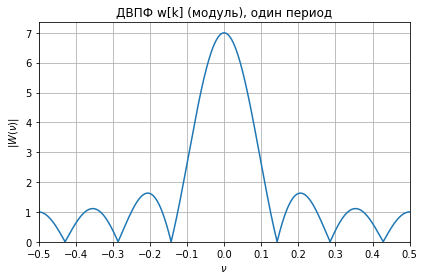

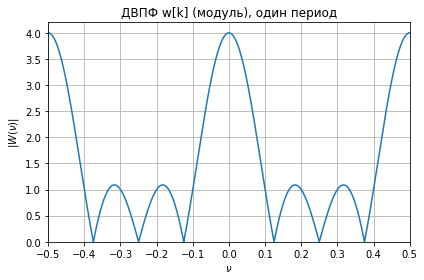

In [10]:

w=np.ones(N)

plt.figure(figsize=[6, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

for i in range(N):
    w[i] = (i % L == 0)
# new w    
    
plt.figure(figsize=[6, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


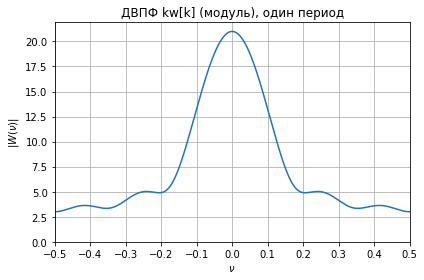

In [ ]:
w=np.arange(N)

plt.figure(figsize=[6, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ kw[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 


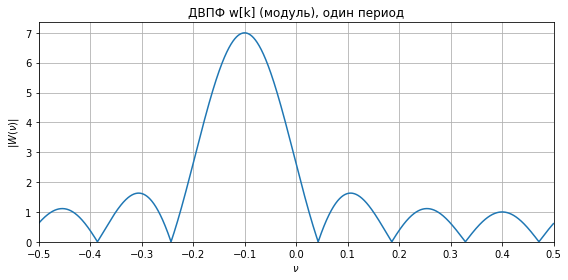

In [ ]:
w4 = np.linspace(1j, 1j, N)
for i in range(w4.size):
    w4[i] = np.exp(2j * np.pi * v0 * i)

plt.figure(figsize=[8, 4])
nu, W4 = dtft(w4, M=2048)
plt.plot(nu, abs(W4))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

a) $ X_s(v) = \frac{sin(7 \pi (v - 0.1))}{sin(\pi (v - 0.1))}\exp(-1j 6 \pi (v - 0.1)) $ \
б) Произошел сдвиг влево на 0.1 \
в) потому что сдвинули...

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

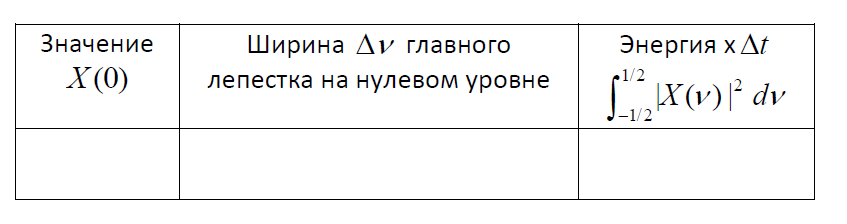

Энергия: 231.0


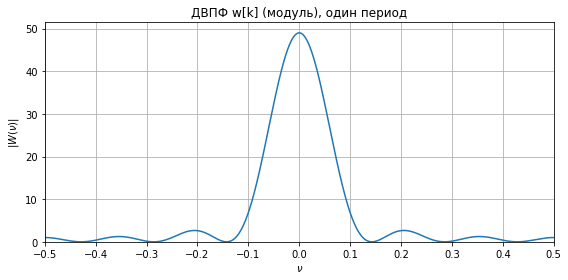

In [ ]:
w5=signal.convolve(w1, w1)

plt.figure(figsize=[8, 4])
nu, W5 = dtft(w5, M=2048)
plt.plot(nu, abs(W5))
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

E = np.sum(list(map(lambda el: el**2, w5)))
print("Энергия:", E)

$ X(0) = 49 $ \
$ dv = 0.28 $


# Занятие 2. Основные свойства ДПФ

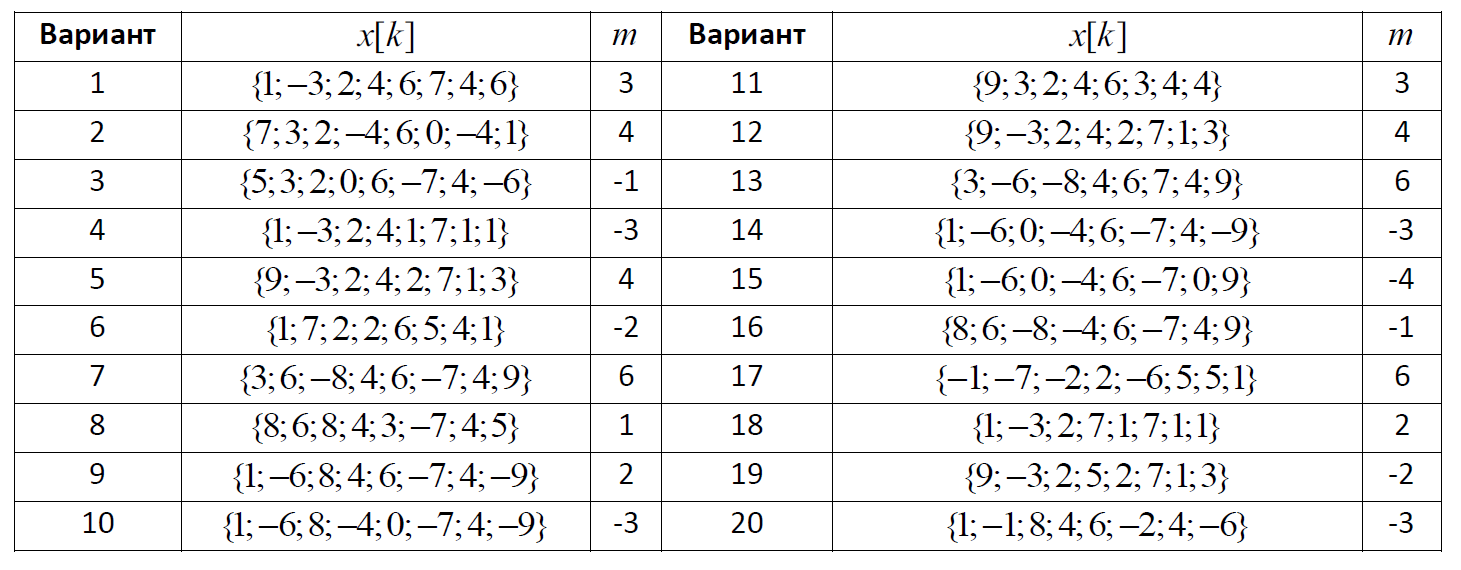

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


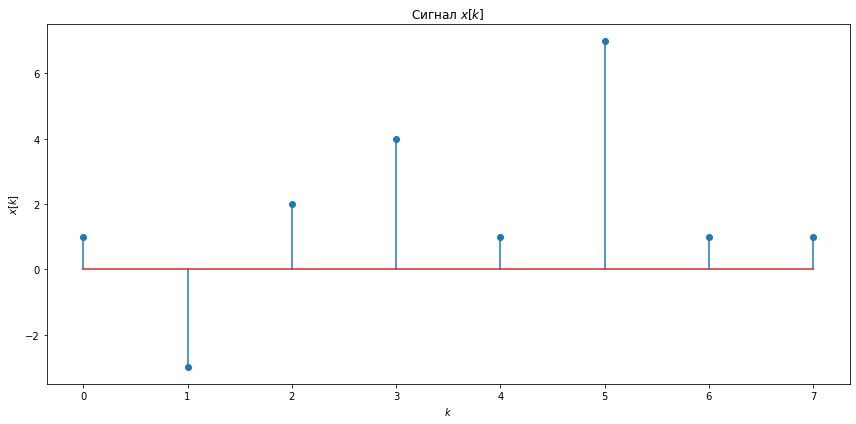

In [12]:
x = np.array([1, -3, 2, 4, 1, 7, 1, 1])

N = len(x)
k = np.arange(N)
plt.figure(figsize=[12, 6])
plt.stem(k, x)
plt.title('Сигнал $x[k]$')
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.tight_layout()

Wmatr = scipy.linalg.dft(N)
X = Wmatr @ x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


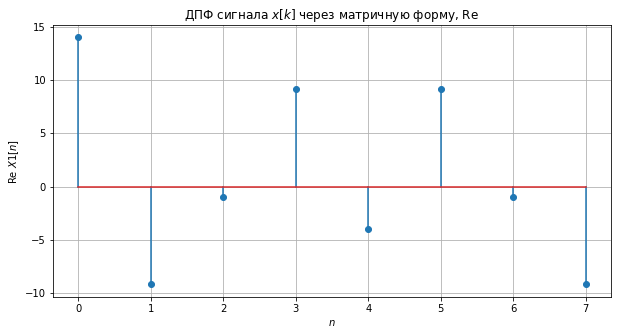

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


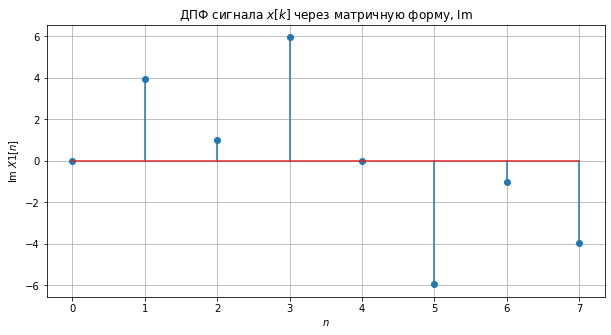

In [22]:
n = k
plt.figure(figsize=[10, 5])
plt.stem(n, X.real)
plt.title('ДПФ сигнала $x[k]$ через матричную форму, Re')
plt.xlabel('$n$')
plt.ylabel('Re $X1[n]$')
plt.grid()
plt.show();

plt.figure(figsize=[10, 5])
plt.stem(n, X.imag)
plt.title('ДПФ сигнала $x[k]$ через матричную форму, Im')
plt.xlabel('$n$')
plt.ylabel('Im $X1[n]$')
plt.grid()
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


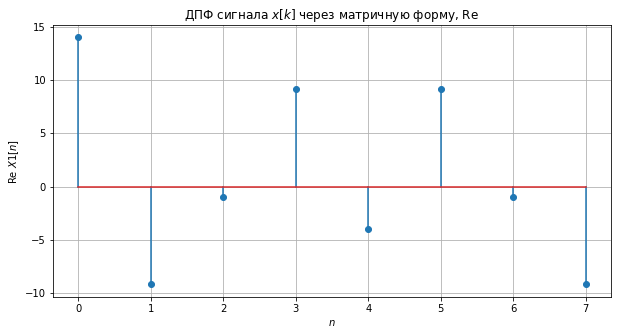

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


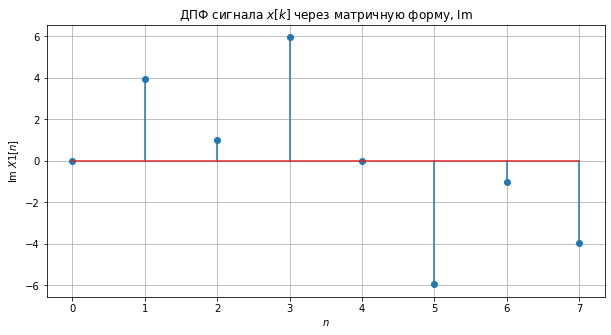

0.0

In [23]:
X2=np.fft.fft(x)
plt.figure(figsize=[10, 5])
plt.stem(n, X2.real)
plt.title('ДПФ сигнала $x[k]$ через матричную форму, Re')
plt.xlabel('$n$')
plt.ylabel('Re $X1[n]$')
plt.grid()
plt.show();

plt.figure(figsize=[10, 5])
plt.stem(n, X2.imag)
plt.title('ДПФ сигнала $x[k]$ через матричную форму, Im')
plt.xlabel('$n$')
plt.ylabel('Im $X1[n]$')
plt.grid()
plt.show();

np.linalg.norm(X - X2)

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem 

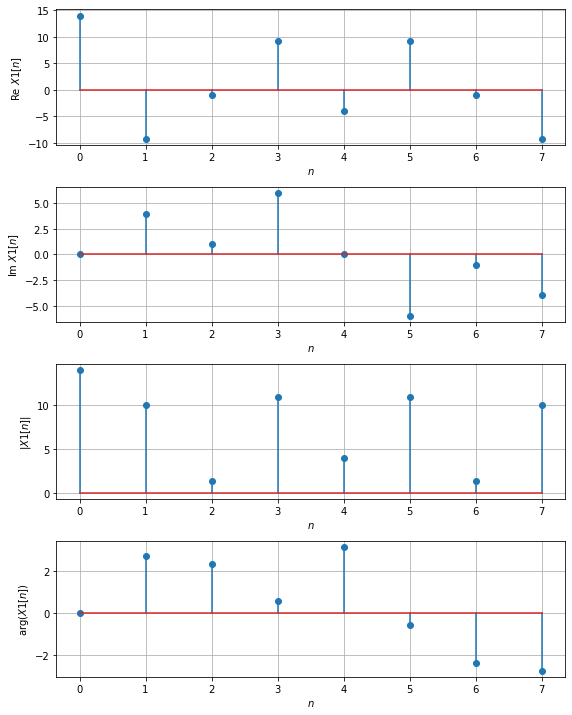

In [24]:
plt.figure(figsize=[8, 10])
plt.title('ДПФ сигнала $x[k]$')

plt.subplot(4, 1, 1)
plt.stem(n, X.real)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Re $X1[n]$')
plt.grid()

plt.subplot(4, 1, 2)
plt.stem(n, X.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X1[n]$')
plt.grid()

plt.subplot(4, 1, 3)
plt.stem(n, abs(X))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('|$X1[n]$|')
plt.grid()

plt.subplot(4, 1, 4)
plt.stem(n, np.angle(X))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('arg($X1[n]$)')
plt.grid()

plt.tight_layout()

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


In [40]:
m = -3
#x = np.array([1, -3, 2, 4, 1, 7, 1, 1])
y = list(x)[-m:] + list(x)[:-m]
print("y: ", y)

y:  [4, 1, 7, 1, 1, 1, -3, 2]


# Занятие 3. Связь ДВПФ и ДПФ

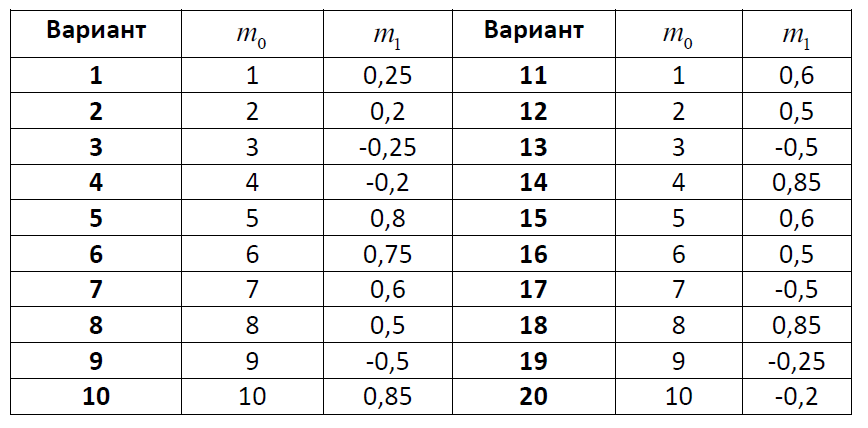

In [46]:
m0 = 4
m1 = -0.2

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{*{35}{l}}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k.  \\
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


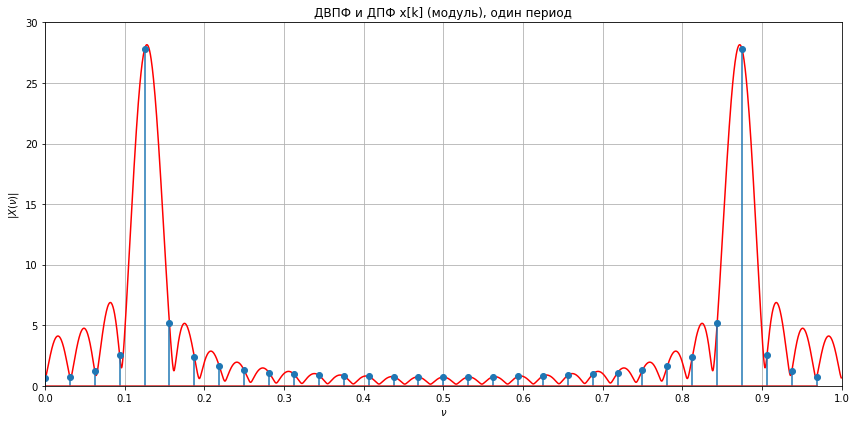

In [57]:
N = 32

k = np.arange(N)
x = np.sin(2 * np.pi / N * m0 * k) + np.sin(2 * np.pi / N * (m0 + 0.25) * k)

def dtft(x, M=2048):
    return np.arange(M)/M, np.fft.fft(x, M)

nu, Xv = dtft(x)
Xn = np.fft.fft(x, N)

plt.figure(figsize=[12, 6])
plt.xlim([0, 1])
plt.ylim([0, 30])
plt.title('ДВПФ и ДПФ x[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')

plt.plot(nu, abs(Xv), '-r')
plt.stem(k / N, abs(Xn))

plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


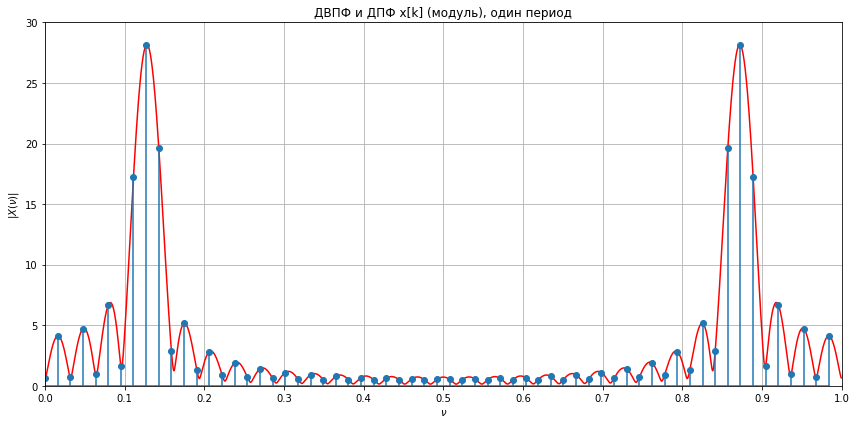

In [63]:
N = 2 * N - 1
k = np.arange(N)
Xn = np.fft.fft(x, N)

plt.figure(figsize=[12, 6])
plt.xlim([0, 1])
plt.ylim([0, 30])
plt.title('ДВПФ и ДПФ x[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')

plt.plot(nu, abs(Xv), '-r')
plt.stem(k / (N), abs(Xn))

plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.tight_layout()

## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


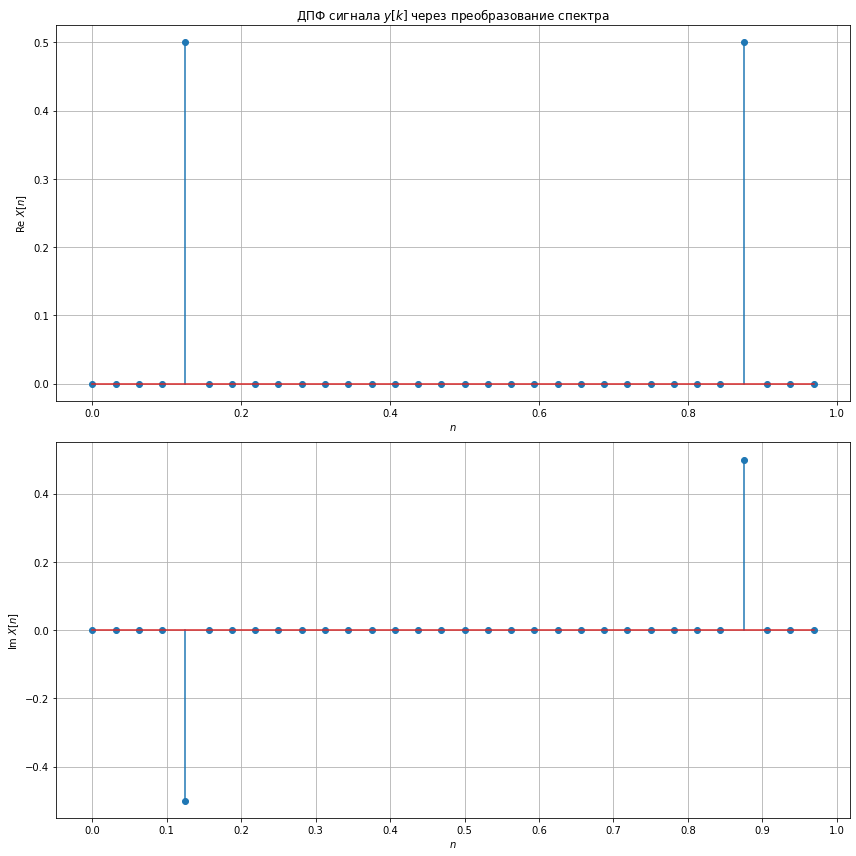

In [68]:
N = 32
m = m0

k = np.arange(N)
x = np.cos(2 * np.pi / N * m * k) + np.sin(2 * np.pi / N * m * k)
Xn = np.fft.fft(x) / N

plt.figure(figsize=[12, 12])
plt.xlim([0, 1])
plt.ylim([0, 30])
plt.title('ДВПФ и ДПФ x[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')

plt.subplot(2, 1, 1)
plt.stem(k / N, Xn.real)
plt.title('ДПФ сигнала $y[k]$ через преобразование спектра')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(k / N, Xn.imag)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


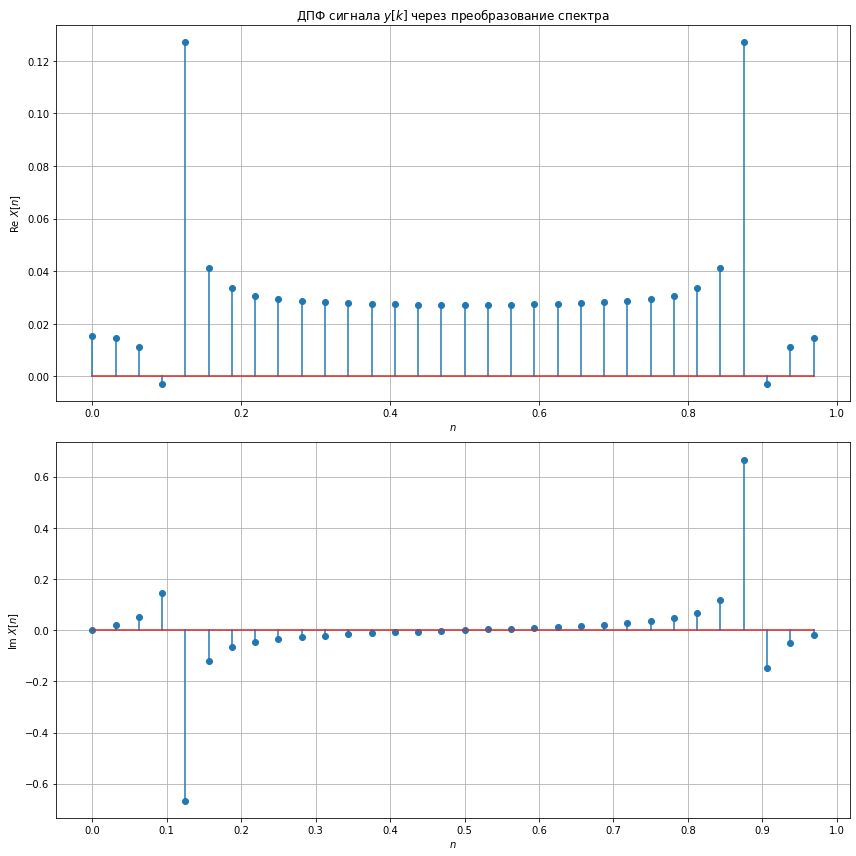

In [69]:
m = m0 + m1

k = np.arange(N)
x = np.cos(2 * np.pi / N * m * k) + np.sin(2 * np.pi / N * m * k)
Xn = np.fft.fft(x) / N

plt.figure(figsize=[12, 12])
plt.xlim([0, 1])
plt.ylim([0, 30])
plt.title('ДВПФ и ДПФ x[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')

plt.subplot(2, 1, 1)
plt.stem(k / N, Xn.real)
plt.title('ДПФ сигнала $y[k]$ через преобразование спектра')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(k / N, Xn.imag)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.xticks(np.linspace(0, 1, 11))
plt.grid()
plt.tight_layout()

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [ ]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [ ]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

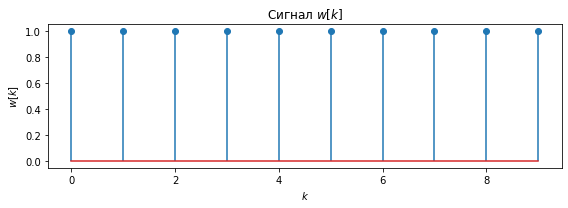

In [ ]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [ ]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [ ]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

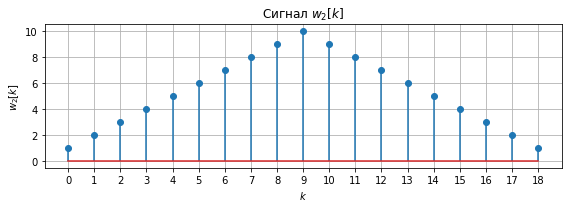

In [ ]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k)
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [ ]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [ ]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [ ]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

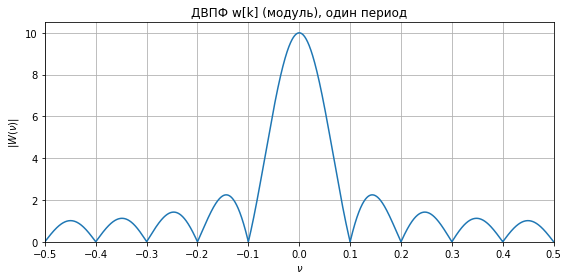

In [ ]:
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

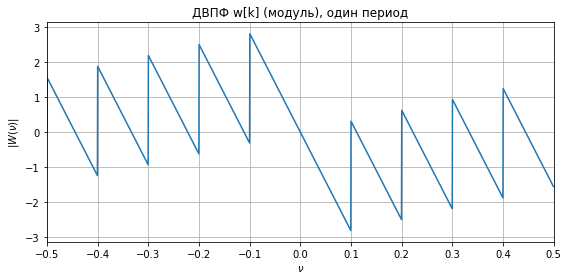

In [ ]:
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [ ]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

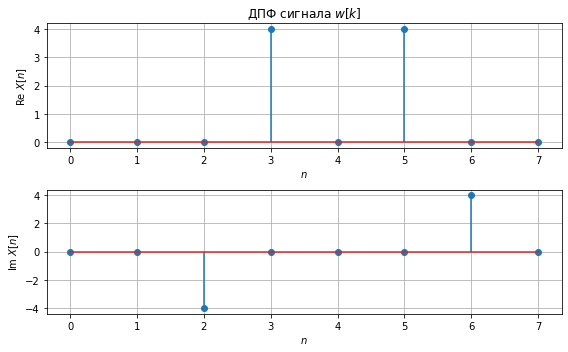

In [ ]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [ ]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  4.44089210e-16+9.15390196e-17j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.86789586e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.86789586e-15j,
       -1.07929736e-15+4.00000000e+00j,  4.44089210e-16-9.15390196e-17j])

Сравним результаты.

In [ ]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [ ]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [ ]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [ ]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [ ]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности 

$$x[k]=\sin \left(2\pi \frac{6.5}{16}\right),\;\;k=0,1,\dots ,N-1.$$

In [ ]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

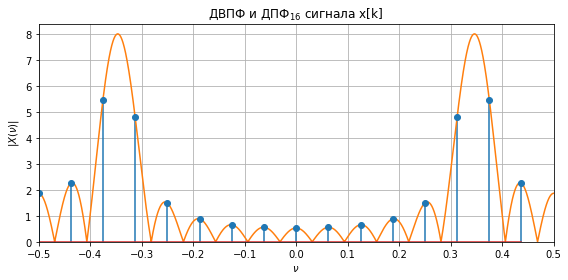

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


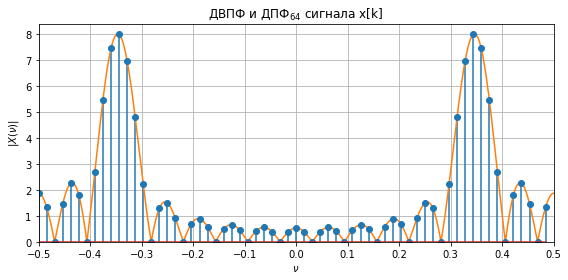

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), 'C0', 'C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()